In [28]:
import numpy as np
import pandas as pd
from nptdms import TdmsFile as TF
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import datetime as dt
from datetime import timedelta as td

In [3]:
path = "Z:\\Test Data\\Raw Data\\Materials Testing\\2018-06-07\\Run 2_together.tdms"
file= TF(path)

In [4]:
df = file.object("Sensors").as_dataframe()

In [38]:
times = file.object("Global", "Time").data
newtime = []
for time in times:
    newtime.append((time - min(times)).total_seconds())
newtime

[0.0,
 0.272027,
 0.528053,
 0.781079,
 1.032103,
 1.285129,
 1.537154,
 1.788179,
 2.040204,
 2.29223,
 2.546255,
 2.814282,
 3.070308,
 3.322332,
 3.575358,
 3.827383,
 4.082409,
 4.334434,
 4.586459,
 4.838484,
 5.09051,
 5.356536,
 5.612562,
 5.864587,
 6.120612,
 6.372638,
 6.625663,
 6.877688,
 7.129713,
 7.385739,
 7.637764,
 7.900791,
 8.156816,
 8.408841,
 8.665867,
 8.919892,
 9.171918,
 9.423942,
 9.675968,
 9.927993,
 10.180019,
 10.445045,
 10.701071,
 10.956096,
 11.210121,
 11.463147,
 11.716172,
 12.124213,
 12.377238,
 12.629263,
 12.889289,
 13.154315,
 13.407341,
 13.659366,
 13.911392,
 14.163417,
 14.415442,
 14.667467,
 14.919492,
 15.171518,
 15.440544,
 15.706571,
 15.960596,
 16.212622,
 16.464647,
 16.717672,
 16.972698,
 17.227723,
 17.480748,
 17.732774,
 18.247825,
 18.515852,
 18.771878,
 19.024903,
 19.277928,
 19.531953,
 19.784979,
 20.038004,
 20.290029,
 20.543054,
 20.79708,
 21.061107,
 21.314131,
 21.567157,
 21.820182,
 22.073207,
 22.325233,
 22.

In [39]:
df.index = newtime

In [40]:
subdf = df[["T_par_1", "T_par_2", "T_per_1", "T_per_2"]]

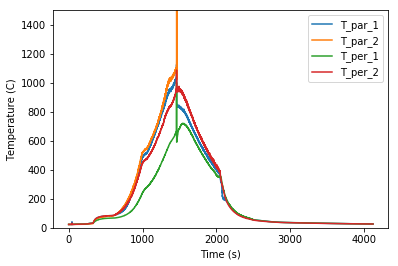

In [55]:
plt.plot(subdf)
plt.ylim((0,1500))
plt.ylabel('Temperature (C)')
plt.xlabel('Time (s)')
plt.legend(subdf.columns)

0.647993549572


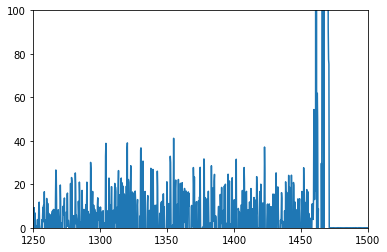

In [103]:
deriv =np.gradient(subdf['T_par_2'], subdf.index)
plt.plot(subdf.index, deriv )
plt.ylim(0,100)
plt.xlim(1250,1500)
print(np.mean(deriv[1250:1450]))

In [44]:
wdf =df['SAMP_T_W_in2'] - df['SAMP_T_W_in1']

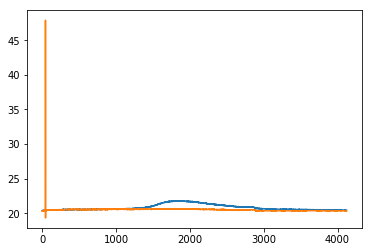

In [48]:
plt.plot(df.index, df['SAMP_T_W_in1'], df['SAMP_T_W_in2'])

1.18196358192


Text(0.5,0,'time (s)')

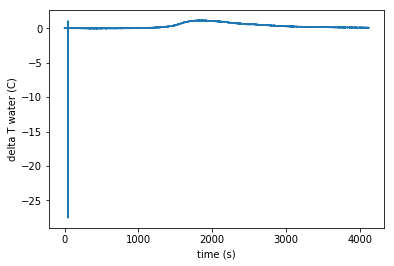

In [54]:
plt.plot(-wdf)
print(max(-wdf))
plt.ylabel("delta T water (C)")
plt.xlabel("time (s)")

In [58]:
images = pd.read_csv("Z:\\Test Data\\Raw Data\\Materials Testing\\2018-06-07\\Run 2_imaging.csv", header = None)

In [83]:
levels = np.unique(images[0:480])

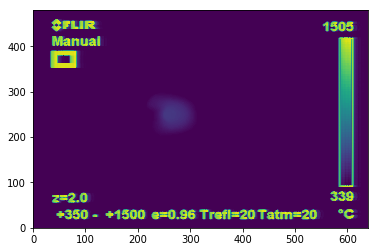

In [91]:
x=0
plt.contourf(images[0+480*x:480+480*x][::-1], levels)